In [15]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from mpl_toolkits.basemap import Basemap

In [9]:
# with pd.read_csv('../../../data/hsc-ssp-pdr3_wide/photo_data/tmp/418296.csv.gz', header = 0, compression = 'gzip', chunksize = 10_000, iterator = True) as df:
#     print(df.get_chunk(5))
    # for df_i in df:
    #     print(df_i)
    #     break


df = pd.read_csv('../../../data/hsc-ssp-pdr3_wide/photo_data/w2_rnd.csv.gz', header = 0, compression = 'gzip')

In [10]:
df[['ra', 'dec']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ra,27674223.0,231.225088,10.843492,211.760190,221.850986,231.273383,240.620366,249.999995
dec,27674223.0,43.347181,0.818615,41.796809,42.645441,43.347351,44.046906,44.887748


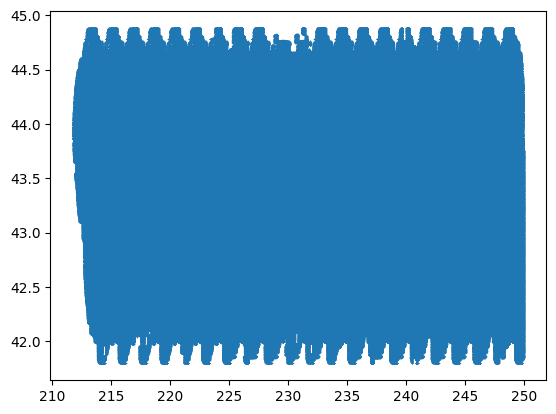

In [11]:
plt.plot(df['ra'], df['dec'], 'o', ms = 0.1, alpha = 0.1)

In [14]:
np.arange(42.5, 44.5, 2), np.arange(215, 245, 2)

(array([42.5]),
 array([215, 217, 219, 221, 223, 225, 227, 229, 231, 233, 235, 237, 239,
        241, 243]))

In [12]:
df[['ra', 'dec']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ra,29196845.0,231.862216,10.784590,211.654131,222.659575,232.285874,241.204907,249.999999
dec,29196845.0,43.345516,0.772659,41.779532,42.699109,43.348849,43.990496,44.905232


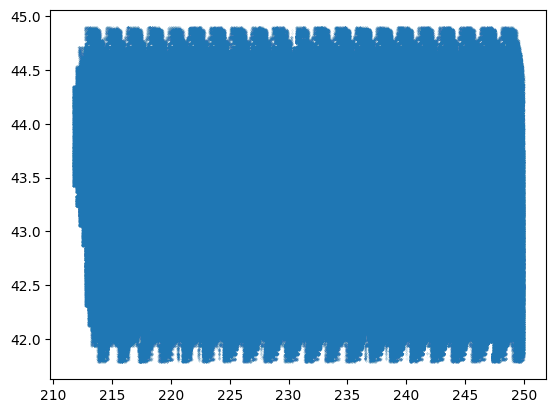

In [13]:
plt.plot(df['ra'], df['dec'], 'o', ms = 0.1, alpha = 0.1)

In [42]:
from astropy.io import fits
from astropy.table import Table, vstack

In [52]:
cols = {}
for i in df.columns:
    if i.startswith('#'):
        cols[i] = (i.replace('#', '').strip())

df = df.rename(columns = cols)

In [53]:
df.dtypes.values

array([dtype('int64'), dtype('float64'), dtype('float64'), dtype('bool'),
       dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('bool'), dtype('bool'),
       dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'),
       dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('bool'), dtype('bool'),
       dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'),
       dtype('bool'), dtype('bool'), dtype('bool'), dtype('bool'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64')], dtype=object)

In [55]:
t = Table.from_pandas( df.iloc[:10] )
t = vstack([ t, Table.from_pandas( df.iloc[10:20] ) ])
t.write('out.fits', format = 'fits', overwrite=True)

In [64]:
from astropy.io import fits

a = fits.open('out.fits')

a[1].data['ra']

array([213.72762486, 213.78624185, 213.7606735 , 213.78413413,
       213.74709523, 213.75988292, 213.75501213, 213.77443429,
       213.80604453, 213.77373068, 213.80329533, 213.70681562,
       213.77595406, 213.76642676, 213.76692823, 213.72369467,
       213.78291539, 213.71208087, 213.79734092, 213.77712143])